This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

## Vaisala Sigmet IRIS 

In [1]:
import wradlib as wrl
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

[IRIS](https://www.vaisala.com/en/products/iris-focus-remote-sensing-software) refers to the commercial Vaisala Sigmet **I**nteractive **R**adar **I**nformation **S**ystem. The Vaisala Sigmet Digital Receivers export data in a [well documented](ftp://ftp.sigmet.com/outgoing/manuals/IRIS_Programmers_Manual.pdf) binary format.

The philosophy behind the $\omega radlib$ interface to the IRIS data model is very straightforward: $\omega radlib$ simply translates the complete binary file structure to *one* dictionary and returns this dictionary to the user. Thus, the potential complexity of the stored data is kept and it is left to the user how to proceed with this data. The keys of the output dictionary are strings that correspond to the Sigmet Data Structures. 


<div class="alert alert-warning">

**Note** <br>
    
For radar data in IRIS/Sigmet format the [openradar community](https://openradarscience.org/) published [xradar](https://docs.openradarscience.org/projects/xradar/en/latest/) where xarray-based readers/writers are implemented. That particular code was ported from $\omega radlib$ to xradar. Please refer to xradar for enhancements for polar radar.    
    
From $\omega radlib$ version 1.19 `IRIS/Sigmet` reading code is imported from [xradar](https://github.com/openradar/xradar)-package whenever and wherever necessary.

Please read the more indepth notebook [iris_backend](../backends/iris_backend.ipynb).
    
</div>

Such a file (typical ending: *.RAWXXXX) can be read by:

In [2]:
fpath = "sigmet/cor-main131125105503.RAW2049"
f = wrl.util.get_wradlib_data_file(fpath)
fcontent = wrl.io.read_iris(f)

In [3]:
# which keywords can be used to access the content?
print(fcontent.keys())
# print the entire content including values of data and
# metadata of the first sweep
# (numpy arrays will not be entirely printed)
print(fcontent["data"][1].keys())
print()
print(fcontent["data"][1]["ingest_data_hdrs"].keys())
print(fcontent["data"][1]["ingest_data_hdrs"]["DB_DBZ"])
print()
print(fcontent["data"][1]["sweep_data"].keys())
print(fcontent["data"][1]["sweep_data"]["DB_DBZ"])

odict_keys(['product_hdr', 'product_type', 'ingest_header', 'nsweeps', 'nrays', 'nbins', 'data_types', 'data', 'raw_product_bhdrs'])
odict_keys(['ingest_data_hdrs', 'record_number', 'first_ray_byte_offset', 'sweep_data', 'ray_offsets'])

odict_keys(['DB_DBZ', 'DB_VEL', 'DB_ZDR', 'DB_KDP', 'DB_PHIDP', 'DB_RHOHV', 'DB_HCLASS'])
OrderedDict({'structure_header': OrderedDict({'structure_identifier': 24, 'format_version': 3, 'bytes_in_structure': 244876, 'flag': 1}), 'sweep_start_time': datetime.datetime(2013, 11, 25, 10, 55, 3, 541000, tzinfo=datetime.timezone.utc), 'sweep_number': 1, 'number_rays_per_sweep': 360, 'first_ray_index': 0, 'number_rays_file_expected': 360, 'number_rays_file_written': 360, 'fixed_angle': 0.4998779296875, 'bits_per_bin': 8, 'data_type': 2})

odict_keys(['DB_DBZ', 'azi_start', 'azi_stop', 'azimuth', 'ele_start', 'ele_stop', 'elevation', 'rbins', 'dtime', 'DB_VEL', 'DB_ZDR', 'DB_KDP', 'DB_PHIDP', 'DB_RHOHV', 'DB_HCLASS'])
[[-20.5 -32.  -32.  ... -32.  -32.  -32. ]


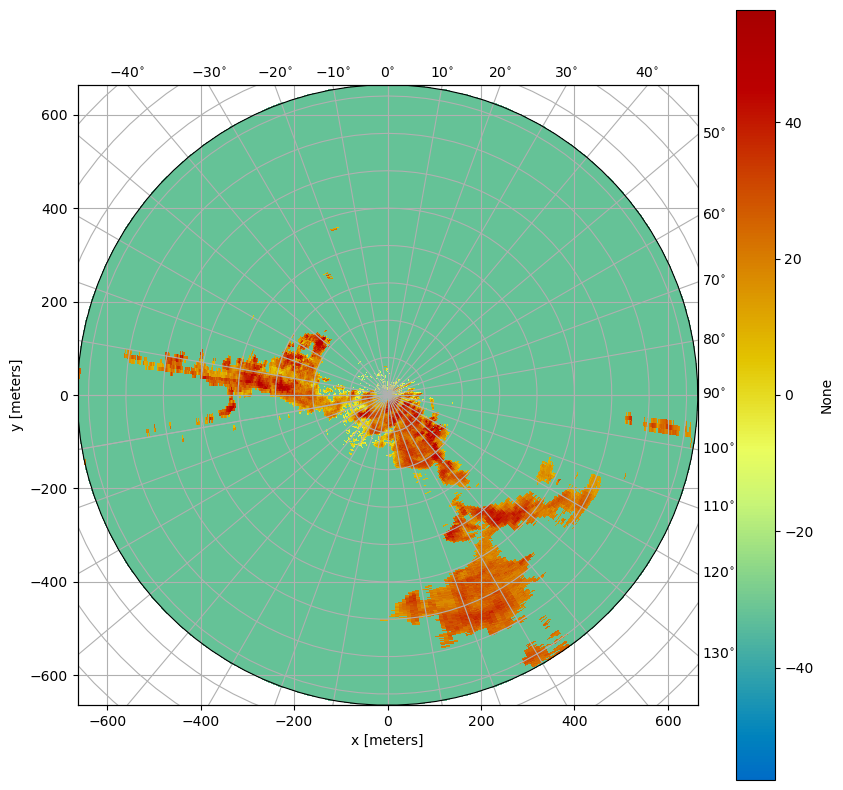

In [4]:
fig = plt.figure(figsize=(10, 10))
swp = fcontent["data"][1]["sweep_data"]
da = wrl.georef.create_xarray_dataarray(
    swp["DB_DBZ"],
).wrl.georef.georeference()
im = da.wrl.vis.plot(fig=fig, crs="cg")